In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
import seaborn as sbn
import random
random.seed(42)
def train_and_eval(data, labels):
    x_train, x_val, y_train, y_val = train_test_split(data,labels, random_state=42)
    clf = SVC()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    print("\tPrecision: %1.3f" % precision_score(y_val, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_val, y_pred))
    return clf

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=";")
g = df.groupby('y')
df = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)) # je ré-equilibre le jeu de donnée pour que l'on ait pas de soucis dans le reste du tp du au desequilibre
df.head()

age            job  marital          education  default housing loan  \
y                                                                            
no 0   54    blue-collar  married           basic.4y       no      no   no   
   1   37     management  married  university.degree  unknown      no   no   
   2   30     technician  married  university.degree  unknown     yes   no   
   3   41  self-employed  married           basic.9y       no     yes   no   
   4   35     technician  married  university.degree       no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
y                                  ...                              
no 0   cellular   may         mon  ...         3    999         0   
   1  telephone   jun         fri  ...        23    999         0   
   2   cellular   jul         tue  ...         1    999         0   
   3   cellular   jul         fri  ...         2    999         0   
   4   cellular   may         mon  ...         3    999         0   

         poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
y                                                                          
no 0  nonexistent         -1.8          92.893          -46.2      1.354   
   1  nonexistent          1.4          94.465          -41.8      4.959   
   2  nonexistent          1.4          93.918          -42.7      4.962   
   3  nonexistent          1.4          93.918          -42.7      4.962   
   4  nonexistent         -1.8          92.893          -46.2      1.299   

      nr.employed   y  
y                      
no 0       5099.1  no  
   1       5228.1  no  
   2       5228.1  no  
   3       5228.1  no  
   4       5099.1  no  

[5 rows x 21 columns]

In [3]:
df.describe()

age     duration     campaign        pdays     previous  \
count  9280.000000  9280.000000  9280.000000  9280.000000  9280.000000   
mean     40.406681   388.740625     2.334267   888.462177     0.311099   
std      11.993169   359.503744     2.312272   312.345841     0.697235   
min      17.000000     1.000000     1.000000     0.000000     0.000000   
25%      31.000000   147.000000     1.000000   999.000000     0.000000   
50%      38.000000   267.000000     2.000000   999.000000     0.000000   
75%      48.000000   529.000000     3.000000   999.000000     0.000000   
max      98.000000  4199.000000    34.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   9280.000000     9280.000000    9280.000000  9280.000000  9280.000000  
mean      -0.474698       93.479422     -40.140054     2.988020  5136.473448  
std        1.726615        0.628538       5.353908     1.892033    87.074397  
min       -3.400000       92.201000     -50.800000     0.634000  4963.600000  
25%       -1.800000       92.893000     -42.700000     1.244000  5076.200000  
50%       -0.100000       93.444000     -41.800000     4.021000  5191.000000  
75%        1.400000       93.994000     -36.400000     4.959000  5228.100000  
max        1.400000       94.767000     -26.900000     5.045000  5228.100000

### Separons et encodons nos labels

In [4]:
y = df.y.values
y

array(['no', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [5]:
y.shape

(9280,)

Quel type choisir ?

In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(np.array(y))
n_sample = y.shape[0]
y

array([0, 0, 0, ..., 1, 1, 1])

N'oublions pas de supprimer la colonne label des données envoyées au modele

In [10]:
df = df.drop("y", axis=1)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

# Encodons quelques colonnes

La colonne job

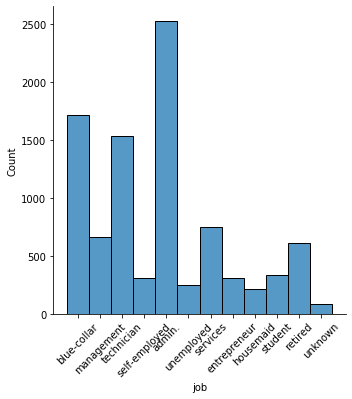

In [11]:
plot = sbn.displot(df["job"])
plot.set_xticklabels(rotation=45)

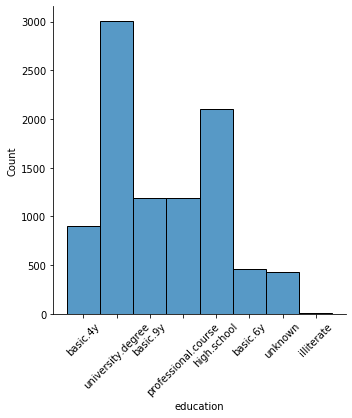

In [12]:
plot = sbn.displot(df["education"])
plot.set_xticklabels(rotation=45)

- Encodons ces deux colonnes et testons de predire y avec :

In [17]:
jobs = df[["job", "education"]].values

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
jobs_ord = enc.fit_transform(jobs)
print("Un element :", jobs_ord[0])

Un element : [1. 0.]


In [18]:
clf = train_and_eval(jobs_ord, y)

	Precision: 0.541
	Recall: 0.626


- Et avec un OneHotEncoding ?

In [19]:
jobs = df[["job", "education"]].values

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
jobs_onehot = enc.fit_transform(jobs)

Regardons le premier element

In [20]:
jobs[0]

array(['blue-collar', 'basic.4y'], dtype=object)

In [21]:
print(jobs_onehot[0])

  (0, 1)	1.0
  (0, 12)	1.0


- testons d'entrainer sur ces valeurs

In [22]:
clf = train_and_eval(jobs_onehot, y)

	Precision: 0.578
	Recall: 0.618


- On est meilleur avec l'ordinal pour le svm
- Et avec un randomforest ?

- rajoutons la colonne age

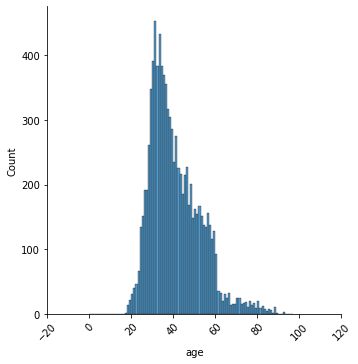

In [23]:
plot = sbn.displot(df["age"], bins=range(max(df.age)))
plot.set_xticklabels(rotation=45)

In [24]:
train_data = np.empty((n_sample, jobs_ord.shape[1]+1))
train_data[:,:-1] = jobs_ord
train_data[:,-1] = df["age"]

In [25]:
clf = train_and_eval(train_data, y)

	Precision: 0.608
	Recall: 0.475


On observe une chute du recall

- mais une colonne a peut être biaisé le modele comme elle a une plage de valeur différente

In [26]:
train_data[0]

array([ 1.,  0., 54.])

- Et si on normalisait tout ça?
 - on ne va pas utiliser un one hot, comme l'age est une grandeur ordonnée
 - attention : __scikit normalizer ne fait pas ce que vous voulez__, il normalise les echantillons (les lignes) au lieu de normaliser les features

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data_norm = scaler.fit_transform(train_data)

In [28]:
train_data_norm[0]

array([0.09090909, 0.        , 0.45679012])

In [29]:
clf = train_and_eval(train_data_norm, y)

	Precision: 0.586
	Recall: 0.547


- L'interet de la normalisation est évidente ici

- benchmarkons la standardisation, comme l'age ressemblait a une distribution normale

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_std = scaler.fit_transform(train_data)

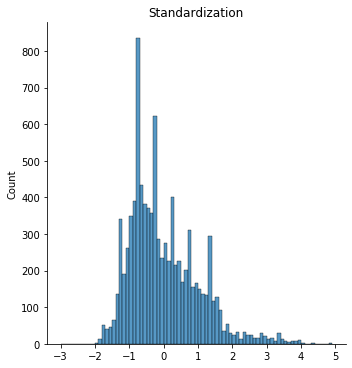

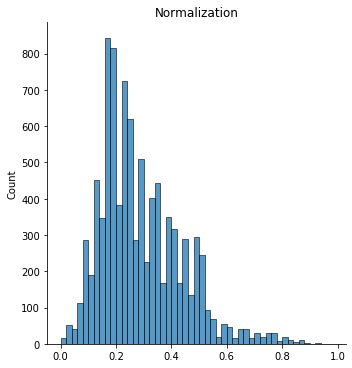

In [31]:
sbn.displot(train_data_std[:,-1],bins=np.arange(-3,5,0.1))
plt.title("Standardization")
sbn.displot(train_data_norm[:,-1],bins=np.arange(0,1,0.02))
_ = plt.title("Normalization")

In [32]:
clf = train_and_eval(train_data_std, y)

	Precision: 0.595
	Recall: 0.531


- la standardisation n'a rien apporté
- on remarque que la distribution n'est pas bien répartie autour de 0, testons des méthodes plus avancées de normalisation

	Precision: 0.599
	Recall: 0.535


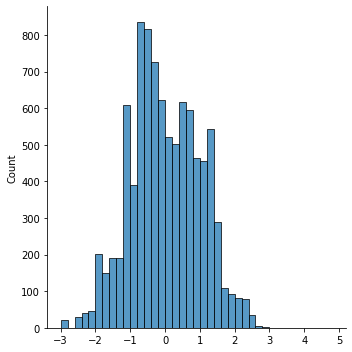

In [33]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
train_data_pt = scaler.fit_transform(train_data)
sbn.displot(train_data_pt[:,-1], bins=np.arange(-3,5,0.2))
clf = train_and_eval(train_data_pt, y)

	Precision: 0.599
	Recall: 0.535


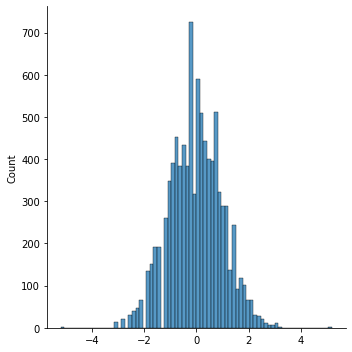

In [34]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal')
train_data_qt = scaler.fit_transform(train_data)
sbn.displot(train_data_qt[:,-1])
clf = train_and_eval(train_data_pt, y)

	Precision: 0.599
	Recall: 0.535


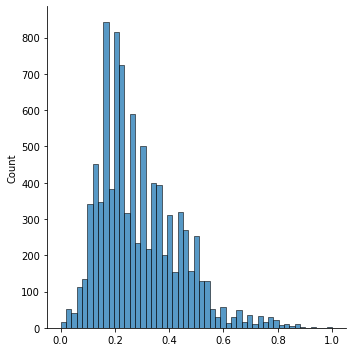

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data_qt = scaler.fit_transform(train_data)
sbn.displot(train_data_qt[:,-1])
clf = train_and_eval(train_data_pt, y)

### Et si on avais eu du texte ?

In [35]:
mon_texte = "une belle chaine de caractere comme notre jeu de donnée n'en avait pas"

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
enc = CountVectorizer()
mon_texte_encode = enc.fit_transform([mon_texte]).todense()

In [37]:
mon_texte_encode

matrix([[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]])

In [38]:
enc.transform(['une nouvelle chaine de caractere']).todense()

matrix([[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]])

- Et pour savoir quelle feature encode quel mot ?

In [39]:
enc.get_feature_names()

['avait',
 'belle',
 'caractere',
 'chaine',
 'comme',
 'de',
 'donnée',
 'en',
 'jeu',
 'notre',
 'pas',
 'une']

- l'ordre n'est donc pas respecté

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
enc = TfidfVectorizer()
mon_texte_encode = enc.fit_transform([mon_texte]).todense()

In [41]:
mon_texte_encode

matrix([[0.25819889, 0.25819889, 0.25819889, 0.25819889, 0.25819889,
         0.51639778, 0.25819889, 0.25819889, 0.25819889, 0.25819889,
         0.25819889, 0.25819889]])